In [1]:
#Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading training dataset 
titanic_train = pd.read_csv('train.csv')
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#Finding out the number of rows and columns
titanic_train.shape

(891, 12)

This shows that there are 891 rows and 12 columns

In [5]:
#Finding missing values
titanic_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

This shows that there are three columns which contains the missing values. 
Those columns are Age, Cabin, Embarked.
And Cabin contain more than half of the data missing.

<AxesSubplot:xlabel='Survived', ylabel='count'>

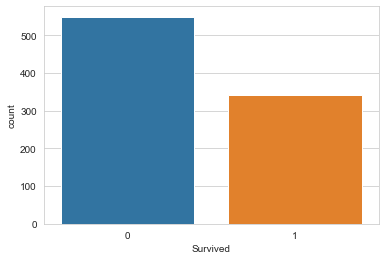

In [7]:
#Finding out the number of people survived 
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', data = titanic_train)

From this countPlot we can conclude that most of the people did not survived.

<AxesSubplot:xlabel='Survived', ylabel='count'>

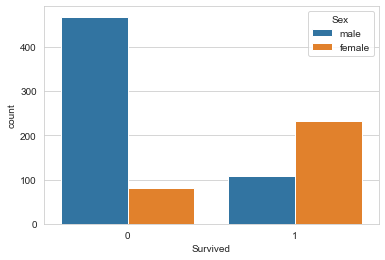

In [10]:
#Now we will find out how many people survived according to their gender
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', hue = 'Sex', data = titanic_train)

From this count plot we can conclude that most of the male didnot survived the titanic incident.

<AxesSubplot:xlabel='Survived', ylabel='count'>

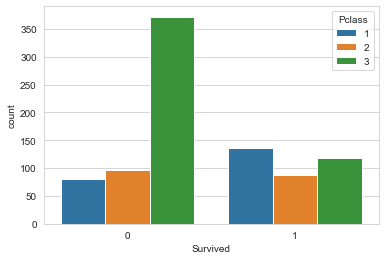

In [11]:
#Now we will find out how many people survived according to their Pclass
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', hue = 'Pclass', data = titanic_train)

From this count plot we can conclude that most of the 3rd class passengers did not survived the titanic incident.
And most survivers are from 1st class.

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

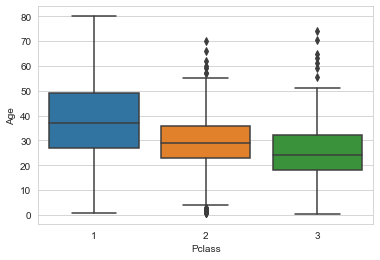

In [14]:
#Now we will handle the missing values in Age column
sns.boxplot(x = 'Pclass', y = 'Age', data = titanic_train)

Now we can see wealthiest people are from class 1. And now we will impute the Age column using average value from each class

In [18]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 28
        else:
            return 24
    else:
        return Age
    

In [19]:
titanic_train['Age'] = titanic_train[['Age','Pclass']].apply(impute_age, axis = 1)

In [21]:
#Finding missing values
titanic_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

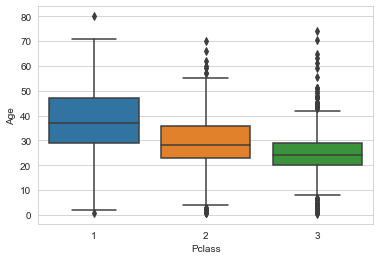

In [22]:
#Now we will handle the missing values in Age column
sns.boxplot(x = 'Pclass', y = 'Age', data = titanic_train)

In [24]:
#Now since Cabin column has most of its values missing we will drop this column
titanic_train.drop('Cabin', axis = 1, inplace = True)
titanic_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,24.0,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


In [25]:
#Now we will drop PassengerId Column because it is of no use in prediction
titanic_train.drop('PassengerId', axis = 1, inplace = True)
titanic_train.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,0,3,"Moran, Mr. James",male,24.0,0,0,330877,8.4583,Q
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


In [26]:
#Now we covert Sex,Embarked columns (Categorical Columsn) in Numerical usind One-HotEncoding
sex = pd.get_dummies(titanic_train['Sex'], drop_first = True)
sex.head()
embarked = pd.get_dummies(titanic_train['Embarked'], drop_first = True)
embarked.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [29]:
#Now we will drop Sex and Embarked columns from the titanic_train
#And concat sex, embarked and titanic_train dfs
titanic_train.drop(['Sex','Embarked','Name', 'Ticket'], axis = 1, inplace = True)
titanic_train.head(10)

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500
5,0,3,24.0,0,0,8.4583
6,0,1,54.0,0,0,51.8625
7,0,3,2.0,3,1,21.0750
8,1,3,27.0,0,2,11.1333
9,1,2,14.0,1,0,30.0708


In [30]:
titanic_train = pd.concat([titanic_train, sex, embarked], axis = 1)
titanic_train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


Now our data is ready for performing predictions.

In [36]:
#Now we will split labels and Features
X = titanic_train.iloc[:,1:].values
y = titanic_train.iloc[:,0].values

In [37]:
X

array([[ 3., 22.,  1., ...,  1.,  0.,  1.],
       [ 1., 38.,  1., ...,  0.,  0.,  0.],
       [ 3., 26.,  0., ...,  0.,  0.,  1.],
       ...,
       [ 3., 24.,  1., ...,  0.,  0.,  1.],
       [ 1., 26.,  0., ...,  1.,  0.,  0.],
       [ 3., 32.,  0., ...,  1.,  1.,  0.]])

In [38]:
y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [39]:
#Now we will perform train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [40]:
#Now we will perform Logistic Regression Algo for making predictions
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression()
regressor.fit(X_train, y_train)

LogisticRegression()

In [41]:
#Now we will make predictions using .predict method
y_pred = regressor.predict(X_test)

In [42]:
compare_df = pd.DataFrame({'Actual': y_test, "Predicted": y_pred})
compare_df.head()

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,1,1
4,1,1


In [43]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy = confusion_matrix(y_test, y_pred)
accuracy

array([[160,  26],
       [ 32,  79]], dtype=int64)

In [44]:
accuracy = accuracy_score(y_test, y_pred) * 100
print()

0.8047138047138047